# Flair Transcript Quantification Results Analysis Part 3

Continuing from Part 2, in this notebook I produce visualization of the novel/annotated transcript expression overview similar to the Extended Data Fig.6A-C in the original paper by Glinos et al (2022). I mainly used the pandas package for data cleaning/manipulation, and the matplotlib and seaborn packages for data visualization.

## Part 1: Import Data and Configure Python Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec
%matplotlib inline
import seaborn as sns
import re
from IPython.display import display
from matplotlib.pyplot import gcf
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from PIL import ImageColor
from matplotlib.patches import Patch #for custom legend making
import scipy.spatial as sp, scipy.cluster.hierarchy as hc #for faster computing of hierarchial clusters

In [2]:
#pd.options.display.max_columns = None #display all columns in dataframe

In [3]:
#pd.options.display.max_colwidth = 100 #show the full content of long strings

### Import and Clean Data

In [4]:
os.getcwd()

'C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research\\gtex_v9_data_analysis\\FLAIR'

In [5]:
data_dir = 'gtex_v9_data\\data_for_analysis\\gtex_database_data'

In [6]:
novel_transcript_quant_clean_path = os.path.join(data_dir, 
                                                      'flair_novel_transcript_quant_clean.csv')
annotated_transcript_quant_clean_path = os.path.join(data_dir, 
                                                      'flair_annotated_transcript_quant_clean.csv')

In [7]:
# change working directory
os.chdir('C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research')

In [8]:
novel_transcript_express_tissue_clean = pd.read_csv(novel_transcript_quant_clean_path)
annotated_transcript_express_tissue_clean = pd.read_csv(annotated_transcript_quant_clean_path)

#### Dataframe of Novel Transcripts

In [9]:
novel_transcript_express_tissue_clean.head(3)

,Unnamed: 0,sample_id,tissue,000187c4-a488-40f0-a69c-0a89582f3241_ENSG00000173848.18,00026598-3078-4e2f-8ac9-dd8f523396b9_ENSG00000102893.15_ENSG00000102893.15,0002a5e2-f01a-4690-a7db-7af726712a5e_ENSG00000071575.11_ENSG00000071575.11,000339f1-1769-4608-b369-59aa222cd7b7_ENSG00000166012.16_ENSG00000166012.16,0003706a-94a7-4419-a61d-6310d7a9c10c_ENSG00000101247.17_ENSG00000101247.17,0004a186-852c-448e-a74c-afdad4fdf319_ENSG00000204356.13_ENSG00000204356.13,0004af18-8dff-40d9-814d-32a45ded762e_ENSG00000007237.18_ENSG00000007237.18,...,fff834dd-554d-46c7-b30a-b92e4be6dd61_ENSG00000131069.19,fff8c888-5eac-4f53-af8e-30a9aa66be58_ENSG00000140750.16,fff8d294-c55c-4453-9aa7-7d8db1e114e2_ENSG00000188917.14_ENSG00000188917.14,fff941ee-d99e-4f68-94b0-4b5ab30a789c_ENSG00000232973.11_ENSG00000232973.11,fffa0051-00fd-4289-86c4-114fa1fd36a1_ENSG00000197444.9_ENSG00000197444.9,fffa90eb-bfc8-49d3-9936-cd1d4ea47708_ENSG00000141030.12_ENSG00000141030.12,fffabc59-08f8-4f01-9835-099e5dfe5bd6_ENSG00000113407.13_ENSG00000113407.13,fffc8c18-b616-42ce-8c53-71b184c0cab8_ENSG00000156261.12_ENSG00000156261.12,fffd4120-f790-4c5d-b903-52dc4a97c8e7_ENSG00000137171.14_ENSG00000137171.14,fffe94ff-bd9f-4c45-b693-96945bf0f3dc_ENSG00000106049.8_ENSG00000106049.8
0,0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),0.0,0.0,0.380702,0.000000,14.847375,0.761404,0.0,...,0.0,0.0,0.0,8.756144,0.000000,0.761404,0.000000,0.000000,0.000000,0.000000
1,1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,0.0,0.0,5.359084,0.297727,18.459067,0.297727,0.0,...,0.0,0.0,0.0,0.000000,0.595454,2.679542,0.595454,0.297727,0.893181,0.297727
2,2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),0.0,0.0,1.961873,0.000000,17.656857,0.000000,0.0,...,0.0,0.0,0.0,3.923746,0.000000,0.000000,0.000000,0.000000,0.980936,0.000000


In [10]:
# drop the first column
novel_transcript_express_tissue_clean.drop(columns=novel_transcript_express_tissue_clean.columns[0], 
                                       axis=1, inplace=True)
novel_transcript_express_tissue_clean.head(3)

,sample_id,tissue,000187c4-a488-40f0-a69c-0a89582f3241_ENSG00000173848.18,00026598-3078-4e2f-8ac9-dd8f523396b9_ENSG00000102893.15_ENSG00000102893.15,0002a5e2-f01a-4690-a7db-7af726712a5e_ENSG00000071575.11_ENSG00000071575.11,000339f1-1769-4608-b369-59aa222cd7b7_ENSG00000166012.16_ENSG00000166012.16,0003706a-94a7-4419-a61d-6310d7a9c10c_ENSG00000101247.17_ENSG00000101247.17,0004a186-852c-448e-a74c-afdad4fdf319_ENSG00000204356.13_ENSG00000204356.13,0004af18-8dff-40d9-814d-32a45ded762e_ENSG00000007237.18_ENSG00000007237.18,0004bfb5-133e-4202-9562-4744a79252db_ENSG00000066697.14_ENSG00000066697.14,...,fff834dd-554d-46c7-b30a-b92e4be6dd61_ENSG00000131069.19,fff8c888-5eac-4f53-af8e-30a9aa66be58_ENSG00000140750.16,fff8d294-c55c-4453-9aa7-7d8db1e114e2_ENSG00000188917.14_ENSG00000188917.14,fff941ee-d99e-4f68-94b0-4b5ab30a789c_ENSG00000232973.11_ENSG00000232973.11,fffa0051-00fd-4289-86c4-114fa1fd36a1_ENSG00000197444.9_ENSG00000197444.9,fffa90eb-bfc8-49d3-9936-cd1d4ea47708_ENSG00000141030.12_ENSG00000141030.12,fffabc59-08f8-4f01-9835-099e5dfe5bd6_ENSG00000113407.13_ENSG00000113407.13,fffc8c18-b616-42ce-8c53-71b184c0cab8_ENSG00000156261.12_ENSG00000156261.12,fffd4120-f790-4c5d-b903-52dc4a97c8e7_ENSG00000137171.14_ENSG00000137171.14,fffe94ff-bd9f-4c45-b693-96945bf0f3dc_ENSG00000106049.8_ENSG00000106049.8
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),0.0,0.0,0.380702,0.000000,14.847375,0.761404,0.0,0.000000,...,0.0,0.0,0.0,8.756144,0.000000,0.761404,0.000000,0.000000,0.000000,0.000000
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,0.0,0.0,5.359084,0.297727,18.459067,0.297727,0.0,0.595454,...,0.0,0.0,0.0,0.000000,0.595454,2.679542,0.595454,0.297727,0.893181,0.297727
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),0.0,0.0,1.961873,0.000000,17.656857,0.000000,0.0,0.000000,...,0.0,0.0,0.0,3.923746,0.000000,0.000000,0.000000,0.000000,0.980936,0.000000


In [11]:
num_novel_transcripts = novel_transcript_express_tissue_clean.shape[1]-2
print("Number of Novel Transcripts: ", num_novel_transcripts)

Number of Novel Transcripts:  72273


#### Dataframe of Annotated Transcripts

In [12]:
annotated_transcript_express_tissue_clean.head(3)

,Unnamed: 0,sample_id,tissue,ENST00000000233.9_ENSG00000004059.10,ENST00000000412.7_ENSG00000003056.7,ENST00000001008.5_ENSG00000004478.7,ENST00000001146.6_ENSG00000003137.8,ENST00000002125.8_ENSG00000003509.15,ENST00000002165.10_ENSG00000001036.13,ENST00000002501.10_ENSG00000003249.13,...,ENST00000640621.1_ENSG00000262633.2,ENST00000640621.1-1_ENSG00000262633.2,ENST00000640674.1_ENSG00000278175.3,ENST00000640752.1_ENSG00000138796.16,ENST00000640769.1_ENSG00000176225.13,ENST00000640799.1_ENSG00000143612.19,ENST00000640815.1_ENSG00000164199.16,ENST00000640876.1_ENSG00000197563.10,ENST00000640893.1_ENSG00000087258.14,ENST00000640967.1_ENSG00000082212.12
0,0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),373.468579,20.557903,22.080711,0.000000,3.045615,3.045615,5.710529,...,2.664913,0.0,3.045615,0.380702,0.000000,0.380702,1.522808,0.0,7.233336,0.380702
1,1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,369.181337,16.374979,24.115878,2.084088,0.595454,2.679542,1.786361,...,1.786361,0.0,1.786361,0.297727,0.893181,0.893181,0.595454,0.0,7.145445,0.297727
2,2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),256.024421,9.809365,7.847492,0.000000,0.980936,6.866555,0.980936,...,2.942809,0.0,2.942809,0.000000,0.980936,0.000000,0.980936,0.0,4.904682,0.000000


In [13]:
# drop the first column
annotated_transcript_express_tissue_clean.drop(columns=annotated_transcript_express_tissue_clean.columns[0], 
                                       axis=1, inplace=True)
annotated_transcript_express_tissue_clean.head(3)

,sample_id,tissue,ENST00000000233.9_ENSG00000004059.10,ENST00000000412.7_ENSG00000003056.7,ENST00000001008.5_ENSG00000004478.7,ENST00000001146.6_ENSG00000003137.8,ENST00000002125.8_ENSG00000003509.15,ENST00000002165.10_ENSG00000001036.13,ENST00000002501.10_ENSG00000003249.13,ENST00000002596.5_ENSG00000002587.9,...,ENST00000640621.1_ENSG00000262633.2,ENST00000640621.1-1_ENSG00000262633.2,ENST00000640674.1_ENSG00000278175.3,ENST00000640752.1_ENSG00000138796.16,ENST00000640769.1_ENSG00000176225.13,ENST00000640799.1_ENSG00000143612.19,ENST00000640815.1_ENSG00000164199.16,ENST00000640876.1_ENSG00000197563.10,ENST00000640893.1_ENSG00000087258.14,ENST00000640967.1_ENSG00000082212.12
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),373.468579,20.557903,22.080711,0.000000,3.045615,3.045615,5.710529,1.142106,...,2.664913,0.0,3.045615,0.380702,0.000000,0.380702,1.522808,0.0,7.233336,0.380702
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,369.181337,16.374979,24.115878,2.084088,0.595454,2.679542,1.786361,25.902239,...,1.786361,0.0,1.786361,0.297727,0.893181,0.893181,0.595454,0.0,7.145445,0.297727
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),256.024421,9.809365,7.847492,0.000000,0.980936,6.866555,0.980936,0.980936,...,2.942809,0.0,2.942809,0.000000,0.980936,0.000000,0.980936,0.0,4.904682,0.000000


In [14]:
num_annotated_transcripts = annotated_transcript_express_tissue_clean.shape[1]-2

In [15]:
print("Number of Annotated Transcripts: ", num_annotated_transcripts)

Number of Annotated Transcripts:  21357


## Part 2: Data Visualization - Transcript Expression Overview of Novel and Annotated Transcripts

### Set up color palette for various tissue types

In [16]:
# color dictionary (same color palette used in Glinos paper)
color_dict = {"Adipose - Subcutaneous":"#ffc0cb",
             "Brain - Anterior cingulate cortex (BA24)":"#8d5b96",
             "Brain - Caudate (basal ganglia)":"#7776b1",
             "Brain - Cerebellar Hemisphere":"#9773ba",
             "Brain - Frontal Cortex (BA9)":"#b873ba",
             "Brain - Putamen (basal ganglia)":"#c893c9",
             "Breast - Mammary Tissue":"#ff69b4",
             "Cells - Cultured fibroblasts":"#d4a910",
             "Heart - Atrial Appendage":"#c4625d",
             "Heart - Left Ventricle":"#bc3c28",
             "Liver":"#815375",
             "Lung":"#0072b5",
             "Muscle - Skeletal":"#1f854e",
             "Pancreas":"#e18726"}

### Section 1: PCA of Transcript Expression

In [17]:
def visualize_PCA(df,figure_title):
    '''
    Conduct PCA on the input dataframe and visualize first 2 principal components.
    Inputs: 
        df: cleaned table of annotated/novel transcript quantification data with tissue type labels
        figure_title: string type, user-defined title
    '''
    df_for_decomp = df.iloc[:,2:] #transcript quantification data only
    df_for_decomp = df_for_decomp.astype('float') #change data type from object to numeric
    # scale the transcript quantification data before PCA
    scaler = StandardScaler()
    df_for_decomp_sc = scaler.fit_transform(df_for_decomp)
    # project transcript quantification data to 2 dimensions
    pca = PCA(2)  
    transcript_data_projected = pca.fit_transform(df_for_decomp_sc)
    # variance percent explained
    pc1_var = np.round(100*pca.explained_variance_ratio_[0],2)
    pc2_var = np.round(100*pca.explained_variance_ratio_[1],2)
    # organize PC into a dataframe and add tissue type information
    transcript_data_projected_df = pd.DataFrame(transcript_data_projected,
                     columns=['PC1', 'PC2'])
    transcript_data_projected_df['tissue'] = df['tissue']
    # plot first 2 PC's
    plt.figure(figsize=(15, 10))
    for key, group in transcript_data_projected_df.groupby(['tissue']):
        plt.plot(group.PC1, group.PC2, 'o', markersize=10, 
             c=color_dict.get(key), label=key)
    plt.legend(bbox_to_anchor=(1.02, 0.5), loc="center left",fontsize=12)
    plt.grid()
    plt.title(figure_title,fontsize=18)
    plt.xlabel('PC1: '+str(pc1_var)+"%",fontsize=16)
    plt.ylabel('PC2: '+str(pc2_var)+"%",fontsize=16)
    
    # export figures
    #plt.savefig('flair_pca_novel',facecolor='w')
    #plt.savefig('flair_pca_annotated',facecolor='w')

### Novel Transcripts

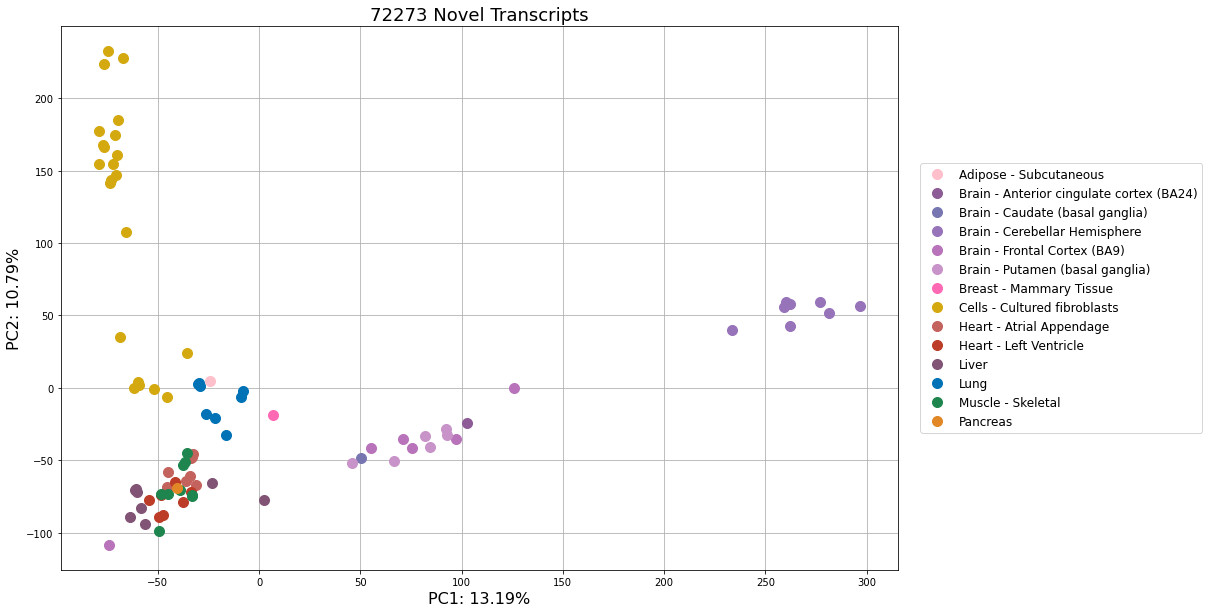

In [18]:
visualize_PCA(novel_transcript_express_tissue_clean,
              str(num_novel_transcripts)+' Novel Transcripts')

### Annotated Transcripts

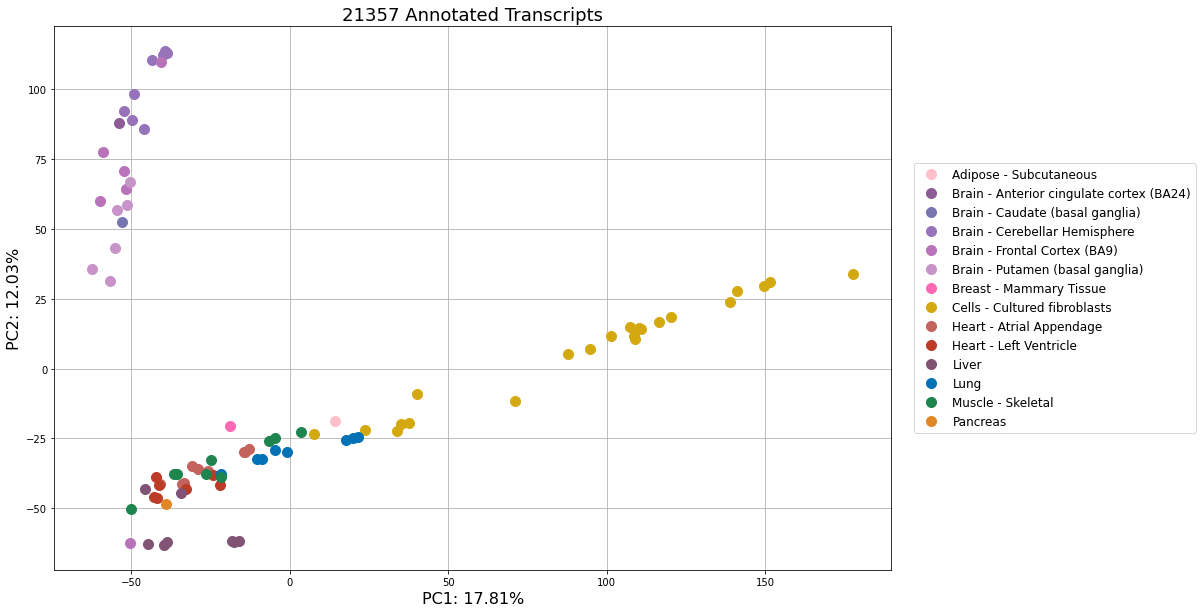

In [19]:
visualize_PCA(annotated_transcript_express_tissue_clean,
              str(num_annotated_transcripts)+' Annotated Transcripts')

### Section 2: Hierarchial Clustering of Transcript Expression using Euclidean distance

In [20]:
def hierarchial_clustering_heatmap(df):
    '''
    Conduct correlation analysis and hierarchial clustering using Euclidean distance on the input dataframe.
    Generate a heatmap of Spearman correlation and dendrogram of hierarchial clustering.
    
    Inputs: 
        df: cleaned table of annotated/novel transcript quantification data with tissue type labels
    '''
    # remove sample id information
    df_hc = df.iloc[: , 1:]
    # transpose the dataframe
    df_hc = df_hc.transpose()
    # replace the header with the first row
    df_hc_header = df_hc.iloc[0] #grab the first row for the header
    df_hc= df_hc[1:] #remove first row from dataset
    df_hc.columns = df_hc_header #set the new header row
    # change data type from object to numeric
    df_hc = df_hc.astype('float')
    # calculate pairwise Spearman correlation between columns (tissue types)
    df_corr = df_hc.corr(method="spearman")
    # add color labels corresponding to different tissue types
    df_col_colors = df_corr.columns.map(color_dict)
    # create custom linkage using Eculidean distance metric
    df_linkage = hc.linkage(sp.distance.pdist(df_corr, metric='euclidean'), method='average')

    # create clustermap
    map_hc = sns.clustermap(df_corr, row_linkage=df_linkage, col_linkage=df_linkage, row_colors=df_col_colors,
                          col_colors=df_col_colors,cmap='BrBG',vmin=0,vmax=1,
                          yticklabels=False,xticklabels=False)
    # adjust axes label parameters
    map_ax = map_hc.ax_heatmap
    map_hc.ax_row_dendrogram.set_visible(False)
    # turn off x,y labels
    map_ax.set_ylabel('')    
    map_ax.set_xlabel('')
    # set colorbar position
    map_hc.cax.set_position([1, .15, .03, .6])
    # add legend for color labels (representing different tissue types)
    handles = [Patch(facecolor=color_dict[tissue_name]) for tissue_name in color_dict]
    plt.legend(handles, color_dict, title='Tissues',ncol=3, bbox_to_anchor=(0.5, 1.65), loc="best")
    
    # export figures
    # plt.savefig('flair_heatmap_novel_revised.png',facecolor='w')
    # plt.savefig('flair_heatmap_annotated_revised.png',facecolor='w')

### Novel Transcripts

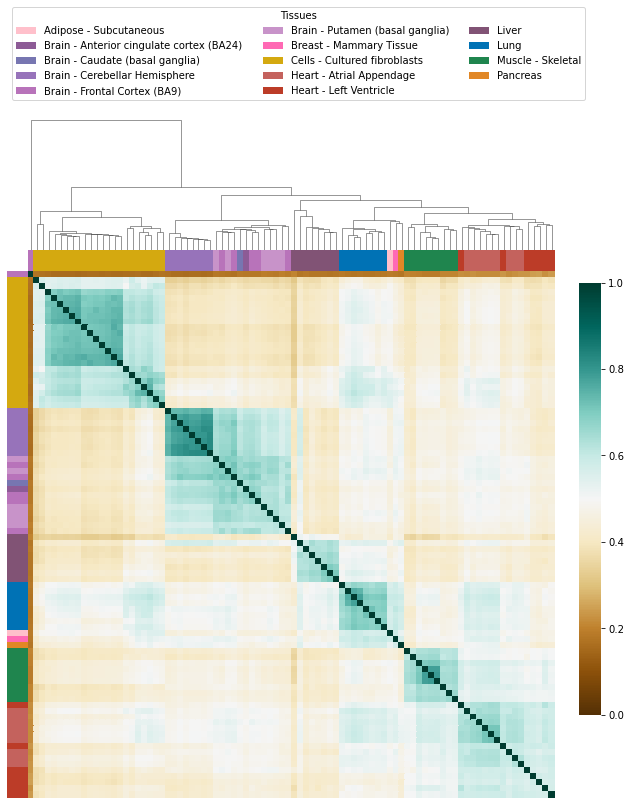

In [21]:
hierarchial_clustering_heatmap(novel_transcript_express_tissue_clean)

### Annotated Transcripts

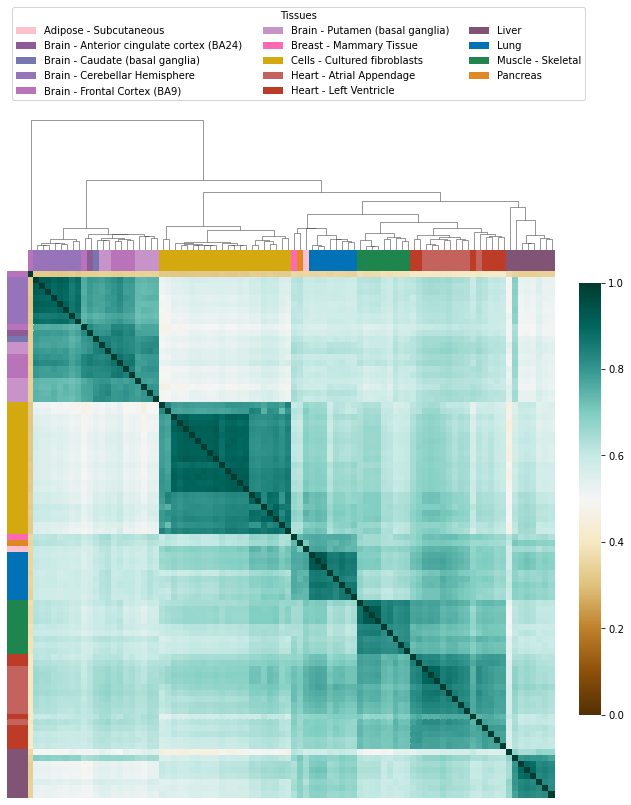

In [22]:
hierarchial_clustering_heatmap(annotated_transcript_express_tissue_clean)

### Section 3: Proportion of Transcripts Expressed at Different TPM Thresholds and Classified based on the Number of Tissues where the Transcript is Expressed

In [23]:
def make_tpm_threshold_prop_table(df,tpm_threshold,novel_or_annotated):
    '''
    Generate a summary data table showing the proportion of transcripts expressed at a given TPM threshold
    and classified based on how many tissues express the transcript in at least 2 samples.
    
    Inputs:
        df: cleaned table of annotated/novel transcript quantification data with tissue type labels
        tpm_threshold: float; 0.1,1 or 10
        novel_or_annotated: string;'novel' or 'annotated'
    '''
    # remove sample id information
    df = df.iloc[: , 1:]
    # transpose the dataframe
    df = df.transpose()
    # replace the header with the first row
    df_header = df.iloc[0] #grab the first row for the header
    df= df[1:] #remove first row from dataset
    df.columns = df_header #set the new header row
    # change data type from object to numeric
    df = df.astype('float')
    
    # for each row (transcript) filter by TPM threshold, group by tissue type and sum up the number of occurences
    transcript_express_tissue_filter = df.gt(tpm_threshold).groupby(level=0, axis=1).sum()
    # filter out the tissue occurences where sample frequency <2, count the total number of occurences for each unique tissue
    transcript_express_tissue_filter_freq = transcript_express_tissue_filter.gt(1).groupby(level=0, axis=1).sum()
    # make a new column "counts" - sum up number of unqiue tissues for each row (transcript)
    transcript_express_tissue_filter_freq['counts'] = transcript_express_tissue_filter_freq.sum(axis=1)
    # make a frequency table to show how many transcripts are expressed classified by the number of tissues where they are expressed
    transcript_express_tissue_filter_freq_table = transcript_express_tissue_filter_freq.value_counts\
        (transcript_express_tissue_filter_freq.counts).to_frame().reset_index()
 
    # rename the columns
    transcript_express_tissue_filter_freq_table = transcript_express_tissue_filter_freq_table.\
        rename(columns={'counts': 'num_tissues', 0: 'num_transcripts'})
    
    # remove the row that has 0 number of tissues if there is one
    transcript_express_tissue_filter_freq_table = transcript_express_tissue_filter_freq_table.sort_values\
        (by='num_tissues')
    # check top row number of tissues
    if transcript_express_tissue_filter_freq_table.iloc[0]['num_tissues']==0:
        # remove the top row
        transcript_express_tissue_filter_freq_table = transcript_express_tissue_filter_freq_table.iloc[1: , :]
    
    # calculate proportion of transcripts
    sum_transcripts = np.sum(transcript_express_tissue_filter_freq_table['num_transcripts'])
    transcript_express_tissue_filter_freq_table['prop_transcripts'] = transcript_express_tissue_filter_freq_table\
        ['num_transcripts']/sum_transcripts
    # add one column to indicate novel or annotated transcripts
    n_a_list = [novel_or_annotated]*transcript_express_tissue_filter_freq_table.shape[0]
    transcript_express_tissue_filter_freq_table['n_or_a'] = n_a_list
    # add one column to indicate TPM threshold level
    tpm_threshold_list = [tpm_threshold]*transcript_express_tissue_filter_freq_table.shape[0]
    transcript_express_tissue_filter_freq_table['TPM_threshold'] = tpm_threshold_list
    
    return  transcript_express_tissue_filter_freq_table

#### Novel Transcripts

In [24]:
novel_01 = make_tpm_threshold_prop_table(novel_transcript_express_tissue_clean,0.1,'novel')
novel_1 = make_tpm_threshold_prop_table(novel_transcript_express_tissue_clean,1,'novel')
novel_10 = make_tpm_threshold_prop_table(novel_transcript_express_tissue_clean,10,'novel')

#### Annotated Transcripts

In [25]:
annotated_01 = make_tpm_threshold_prop_table(annotated_transcript_express_tissue_clean,0.1,'annotated')
annotated_1 = make_tpm_threshold_prop_table(annotated_transcript_express_tissue_clean,1,'annotated')
annotated_10 = make_tpm_threshold_prop_table(annotated_transcript_express_tissue_clean,10,'annotated')

#### Combine Novel and Annotated Tables

In [26]:
tpm_merged_df = pd.concat([novel_01,novel_1,novel_10,annotated_01,annotated_1,annotated_10], ignore_index=True)

In [27]:
tpm_merged_df.head(5)

,num_tissues,num_transcripts,prop_transcripts,n_or_a,TPM_threshold
0,1,3486,0.048514,novel,0.1
1,2,4966,0.069110,novel,0.1
2,3,6814,0.094829,novel,0.1
3,4,7037,0.097932,novel,0.1
4,5,6991,0.097292,novel,0.1


In [28]:
# add a column to the dataframe to indicate mapping notation for barplot color
tpm_merged_df['color_key'] = tpm_merged_df['n_or_a'] + tpm_merged_df['TPM_threshold'].astype('str')

In [29]:
tpm_merged_df

,num_tissues,num_transcripts,prop_transcripts,n_or_a,TPM_threshold,color_key
0,1,3486,0.048514,novel,0.1,novel0.1
1,2,4966,0.069110,novel,0.1,novel0.1
2,3,6814,0.094829,novel,0.1,novel0.1
3,4,7037,0.097932,novel,0.1,novel0.1
4,5,6991,0.097292,novel,0.1,novel0.1
5,6,6963,0.096902,novel,0.1,novel0.1
6,7,6914,0.096220,novel,0.1,novel0.1
7,8,7983,0.111097,novel,0.1,novel0.1
8,9,20702,0.288104,novel,0.1,novel0.1
9,1,17355,0.324477,novel,1.0,novel1.0


#### Plotting

In [30]:
# make a color map dictionary
color_map = {'novel0.1':'lightpink','novel1.0':'hotpink','novel10.0':'mediumvioletred',\
            'annotated0.1':'lightsteelblue','annotated1.0':'cornflowerblue','annotated10.0':'royalblue'}

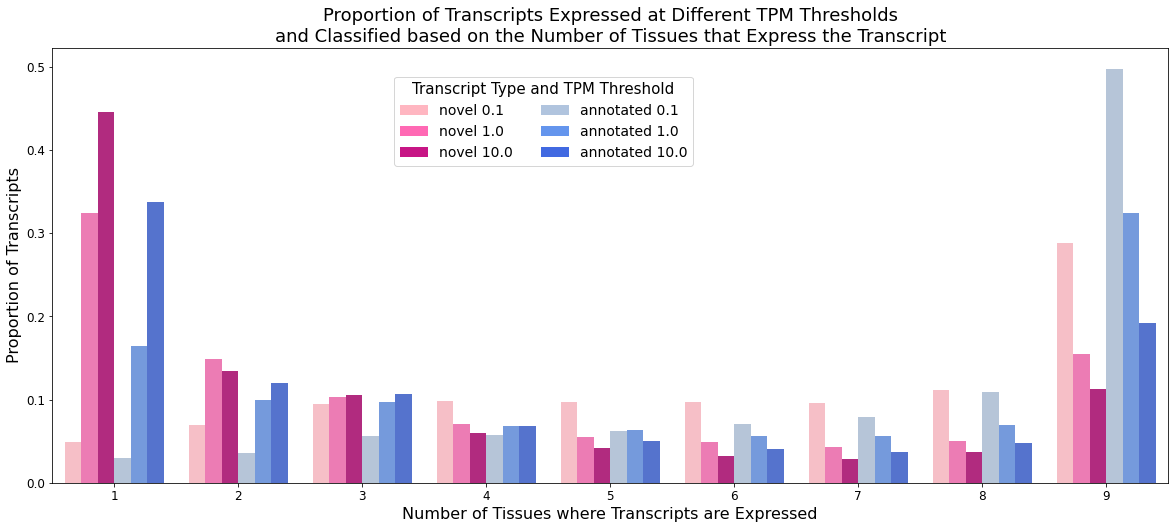

In [31]:
# make the barplot
plt.figure(figsize=(20, 8))

# grouped barplot
sns.barplot(x="num_tissues", y="prop_transcripts", hue="color_key", data=tpm_merged_df, palette=color_map,ci=None)
# changing the fontsize of ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Proportion of Transcripts Expressed at Different TPM Thresholds\nand Classified based on the Number of Tissues that Express the Transcript',fontsize=18)
plt.xlabel('Number of Tissues where Transcripts are Expressed',fontsize=16)
plt.ylabel('Proportion of Transcripts',fontsize=16)

# custom legend
color_map_forlegend = {'novel 0.1':'lightpink','novel 1.0':'hotpink','novel 10.0':'mediumvioletred',\
            'annotated 0.1':'lightsteelblue','annotated 1.0':'cornflowerblue','annotated 10.0':'royalblue'}
tpm_handles = [Patch(facecolor=color_map_forlegend[ckey]) for ckey in color_map_forlegend]
custom_legend = plt.legend(tpm_handles, color_map_forlegend, title='Transcript Type and TPM Threshold',
           ncol=2, bbox_to_anchor=(0.3, 0.95), loc="best",fontsize=14,title_fontsize=15)

In [32]:
tpm_merged_selected_df = tpm_merged_df[['num_transcripts','TPM_threshold','n_or_a']]
trasncript_count_by_tpm_threshold = tpm_merged_selected_df.groupby(['TPM_threshold','n_or_a']).sum()

In [33]:
trasncript_count_by_tpm_threshold

num_transcripts
TPM_threshold n_or_a                    
0.1           annotated            21287
              novel                71856
1.0           annotated            19451
              novel                53486
10.0          annotated             9457
              novel                11672